In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(10000, 10)

In [5]:
d = 10
numbers_of_selection = [0]*d
sum_of_rewards = [0]*d
ads_selected = []
N =10000
total_reward = 0

for n in range(0, N):
    max_upper_bound = 0
    ad = 0
    for i in range(0, d):
        if numbers_of_selection[i] > 0:
            average_reward = sum_of_rewards[i]/numbers_of_selection[i]
            delta_i = math.sqrt(1.5*math.log(n + 1) / numbers_of_selection[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if max_upper_bound < upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selection[ad] += 1
    sum_of_rewards[ad] += df.values[n, ad]
    total_reward += df.values[n, ad]

In [6]:
total_reward

2178

Text(0, 0.5, 'No. of times ad was selected')

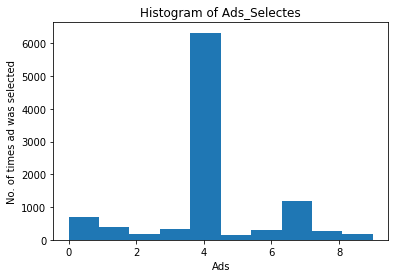

In [7]:
plt.hist(ads_selected)
plt.title("Histogram of Ads_Selectes")
plt.xlabel("Ads")
plt.ylabel("No. of times ad was selected")

In [8]:
def findReward(i):
    reward = 0
    for n in range(N):
        reward += df.values[n, i]
    return reward

In [9]:
for i in range(d):
    reward = findReward(i)
    print("If only", i, "ad then reward :", reward)

If only 0 ad then reward : 1703
If only 1 ad then reward : 1295
If only 2 ad then reward : 728
If only 3 ad then reward : 1196
If only 4 ad then reward : 2695
If only 5 ad then reward : 126
If only 6 ad then reward : 1112
If only 7 ad then reward : 2091
If only 8 ad then reward : 952
If only 9 ad then reward : 489
